# Análisis Exploratio: datos IBEX 35
Irene Pico López

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Descarga de los datos:

In [2]:
# Descargamos los datos históricos del IBEX 35 usando yfinance
ibex35 = yf.download('^IBEX', start='2010-01-01', end='2024-08-01')

# Mostramos las primeras y las últimas filas del DataFrame
ibex35

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200
...,...,...,...,...,...,...
2024-07-25,11133.299805,11158.099609,11012.000000,11145.599609,11145.599609,120027800
2024-07-26,11102.799805,11177.599609,11068.700195,11165.900391,11165.900391,86560000
2024-07-29,11221.799805,11254.200195,11089.700195,11117.799805,11117.799805,76497300


#### 2. Comprobación de valores ausentes:

In [3]:
# Información general del DataFrame
print(ibex35.info())
print('\n')
# Comprobación de valores nulos y valores NA
print('Valores nulos:')
print(ibex35.isnull().sum())
print('\n')

print('Valores NA:')
print(ibex35.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3729 entries, 2010-01-04 to 2024-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3729 non-null   float64
 1   High       3729 non-null   float64
 2   Low        3729 non-null   float64
 3   Close      3729 non-null   float64
 4   Adj Close  3729 non-null   float64
 5   Volume     3729 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 203.9 KB
None


Valores nulos:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Valores NA:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### 3. Visualización de la evolución temporal (Adj Close):

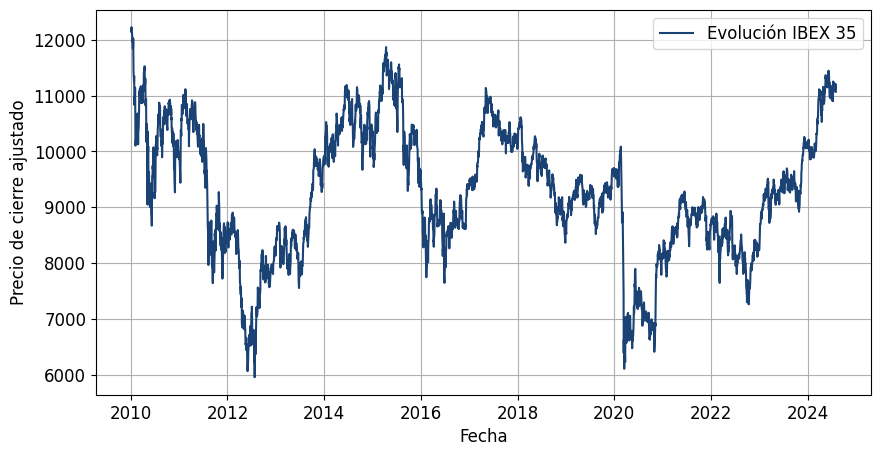

In [4]:
# Gráfico de la serie temporal del precio de cierre ajustado
plt.figure(figsize=(10, 5))
plt.plot(ibex35['Adj Close'], label='Evolución IBEX 35', color='#1b4275') 
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de cierre ajustado', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Aumentar el tamaño de los números en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

#### 4. Estudio de la distribución estadística de las rentabilidades:

In [5]:
# Estadísticos principales DataFrame
print(ibex35.describe())

               Open          High           Low         Close     Adj Close  \
count   3729.000000   3729.000000   3729.000000   3729.000000   3729.000000   
mean    9281.838588   9348.593705   9202.897458   9277.849293   9277.845002   
std     1165.591061   1162.980433   1166.120828   1165.355773   1165.354308   
min     5950.399902   6093.100098   5814.500000   5956.299805   5956.293945   
25%     8503.599609   8577.700195   8423.599609   8493.000000   8493.000000   
50%     9267.700195   9321.599609   9208.200195   9268.000000   9267.990234   
75%    10210.599609  10274.700195  10121.500000  10206.299805  10206.289062   
max    12218.000000  12240.500000  12147.599609  12222.500000  12222.487305   

             Volume  
count  3.729000e+03  
mean   2.064288e+08  
std    1.008473e+08  
min    0.000000e+00  
25%    1.445663e+08  
50%    1.928680e+08  
75%    2.592220e+08  
max    9.752120e+08  


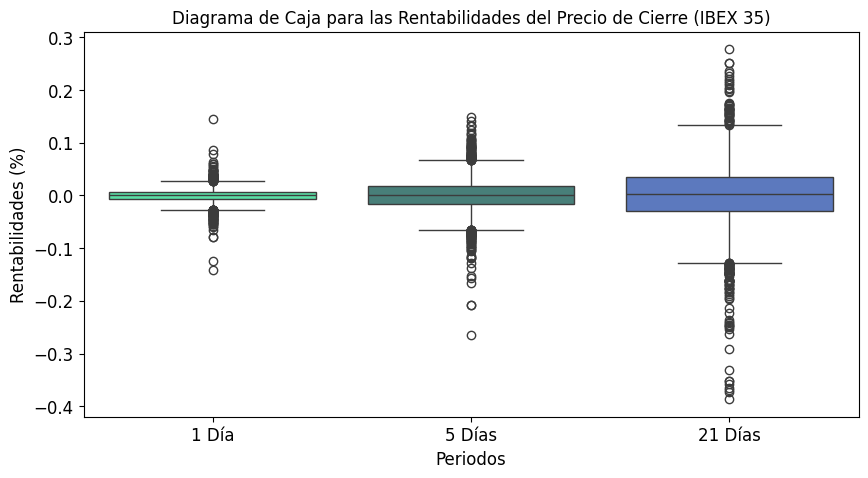

In [6]:
# Configurar el tamaño de los gráficos
plt.figure(figsize=(10, 5))

# Calcular las rentabilidades a distintos periodos usando la columna 'Close'
ret_1d = ibex35['Close'].pct_change(1)   # Rentabilidad a 1 día
ret_5d = ibex35['Close'].pct_change(5)   # Rentabilidad a 5 días
ret_21d = ibex35['Close'].pct_change(21) # Rentabilidad a 21 días

# Crear un nuevo DataFrame con las rentabilidades calculadas
rentabilidades = pd.DataFrame({
    '1 Día': ret_1d,
    '5 Días': ret_5d,
    '21 Días': ret_21d
})

# Crear un diagrama de caja para las rentabilidades a diferentes periodos
sns.boxplot(data=rentabilidades, 
            palette=['#44f4a8', '#3f8880', '#4c73ce'])

# Título y etiquetas del gráfico
plt.title('Diagrama de Caja para las Rentabilidades del Precio de Cierre (IBEX 35)')
plt.xlabel('Periodos', fontsize=12)
plt.ylabel('Rentabilidades (%)', fontsize=12)

# Aumentar el tamaño de los números en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


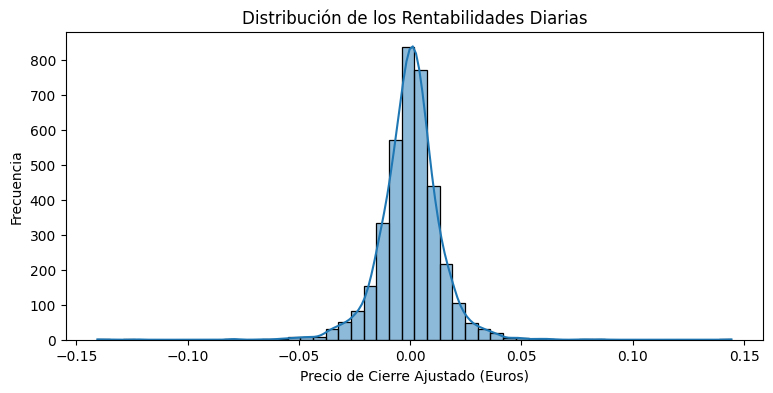

In [7]:
# Histograma de las rentabilidades diarias
plt.figure(figsize=(9, 4))
ret_1 = ibex35['Adj Close'].pct_change(1)
sns.histplot(ret_1, bins=50, kde=True)
plt.title('Distribución de los Rentabilidades Diarias')
plt.xlabel('Precio de Cierre Ajustado (Euros)')
plt.ylabel('Frecuencia')
plt.show()


#### 5. Análisis de correlaciones:

In [8]:
# Seleccionar las columnas relevantes para el análisis de correlación
df_corr = ibex35[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

               Open      High       Low  Adj Close    Volume
Open       1.000000  0.998405  0.997830   0.996007 -0.136346
High       0.998405  1.000000  0.997422   0.998020 -0.127408
Low        0.997830  0.997422  1.000000   0.998294 -0.149583
Adj Close  0.996007  0.998020  0.998294   1.000000 -0.139941
Volume    -0.136346 -0.127408 -0.149583  -0.139941  1.000000


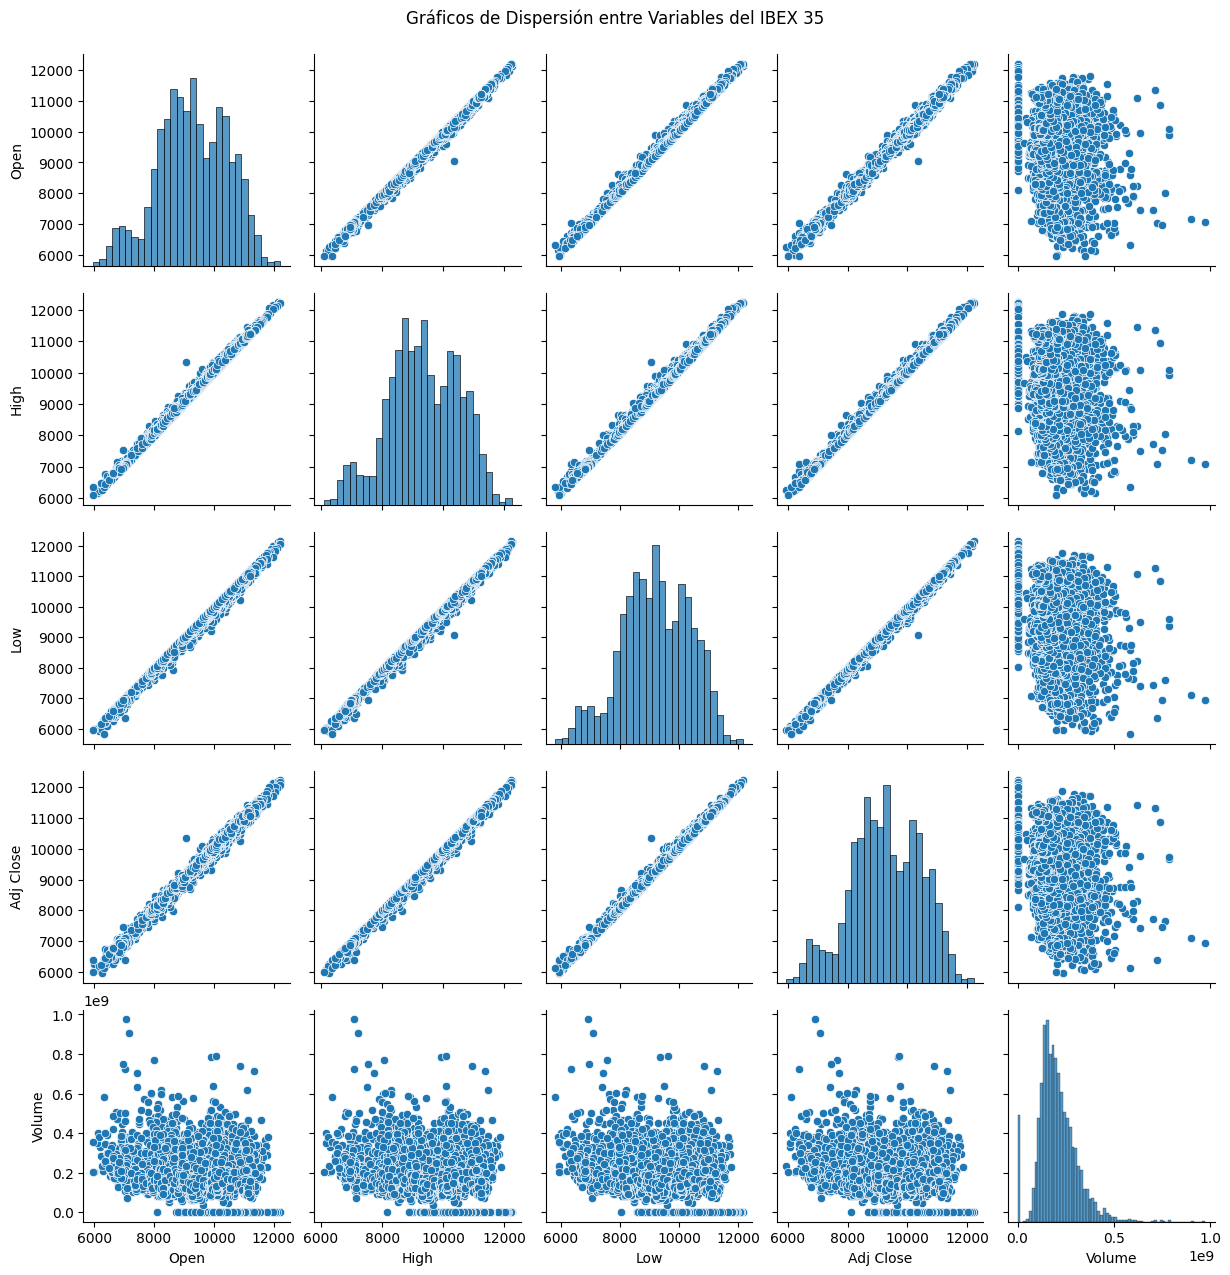

In [9]:
# Seleccionar las columnas relevantes para el análisis de dispersión
df_scatter = ibex35[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

# Crear un par de gráficos de dispersión
sns.pairplot(df_scatter)
plt.suptitle('Gráficos de Dispersión entre Variables del IBEX 35', y=1.02)
plt.show()

#### 6.Almacenamiento de los datos:

In [10]:
# Guardamos los datos en un archivo HDF5
ibex35.to_hdf('ibex35.h5', key='rawData', mode='w')

In [11]:
# Mostramos todas las claves en el archivo
with pd.HDFStore('ibex35.h5', mode='r') as hdf:
    print(hdf.keys())  

['/rawData']
